In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("flight_train.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# Removing unnamed column and id column from the dataset
data = data.drop(["Unnamed: 0","id"],axis = 1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Getting info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [5]:
# Looking for null values
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [6]:
# We have Null values in "Arrival Delay" column
data[data["Arrival Delay in Minutes"].isna()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [7]:
# Remove rows that contains Null values 
data = data.dropna()
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
data.isnull().sum() # No Null values

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
# Predicting Passenger Satisfaction
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [10]:
categorical_columns = (data.dtypes == "object")
categorical_list = list(categorical_columns[categorical_columns].index)
print(categorical_list)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [11]:
# Encoding Categorical Features
le = LabelEncoder()
for i in categorical_list:
    data[i] = le.fit_transform(data[i]) 

In [12]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [13]:
x = data.drop(["Gender","Customer Type","satisfaction"],axis = 1)
y = data["satisfaction"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [15]:
scaler = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 42)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
lg = LogisticRegression()
model = lg.fit(x_train_scaled,y_train)

In [17]:
y_pred = model.predict(x_test_scaled)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [18]:
from sklearn import metrics

In [19]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     17583
           1       0.85      0.82      0.83     13496

    accuracy                           0.86     31079
   macro avg       0.86      0.85      0.85     31079
weighted avg       0.86      0.86      0.86     31079



In [20]:
metrics.roc_auc_score(y_test,y_pred)

0.8522687350141278

In [21]:
knn = KNeighborsClassifier()
model_1 = knn.fit(x_train_scaled,y_train)

In [22]:
y_pred_1 = model_1.predict(x_test_scaled)

In [23]:
print(metrics.classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     17583
           1       0.94      0.88      0.91     13496

    accuracy                           0.93     31079
   macro avg       0.93      0.92      0.92     31079
weighted avg       0.93      0.93      0.92     31079



In [24]:
metrics.roc_auc_score(y_test,y_pred_1)

0.9198681540756432

In [25]:
gbc = GradientBoostingClassifier()
model_2 = gbc.fit(x_train_scaled,y_train)

In [26]:
y_pred_2 = model_2.predict(x_test_scaled)

In [27]:
print(metrics.classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     17583
           1       0.94      0.91      0.92     13496

    accuracy                           0.93     31079
   macro avg       0.93      0.93      0.93     31079
weighted avg       0.93      0.93      0.93     31079



In [28]:
metrics.roc_auc_score(y_test,y_pred_2)

0.9312145050820191

<AxesSubplot:>

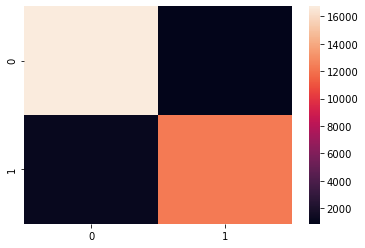

In [29]:
cm = metrics.confusion_matrix(y_test,y_pred_2)
sns.heatmap(cm)

In [30]:
rfc = RandomForestClassifier()
model_3 = rfc.fit(x_train_scaled,y_train)

In [31]:
y_pred_3 = model_3.predict(x_test_scaled)

In [32]:
print(metrics.classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     17583
           1       0.97      0.93      0.95     13496

    accuracy                           0.96     31079
   macro avg       0.96      0.95      0.96     31079
weighted avg       0.96      0.96      0.96     31079



In [33]:
metrics.roc_auc_score(y_test,y_pred_3)

0.9538733470260333

# Feature importance

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

In [44]:
etc = ExtraTreesClassifier(n_estimators = 10,random_state = 42)
model_4 = etc.fit(x,y)

In [45]:
print(model_4.feature_importances_)

[0.02962142 0.16391494 0.05622995 0.03138337 0.16247981 0.01810911
 0.03644869 0.02395615 0.01539556 0.11663325 0.03572252 0.06921809
 0.04351601 0.0422979  0.03057431 0.03649819 0.02420844 0.04024466
 0.01171788 0.01182974]


In [46]:
x_train

,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
66607,40,0,0,2978,4,4,4,4,1,3,1,3,3,2,3,3,3,4,0,0.0
100257,45,0,0,462,4,4,4,4,5,4,5,5,3,3,4,5,4,5,0,0.0
96338,54,0,0,2397,3,3,3,3,4,1,3,4,4,4,4,4,4,4,7,10.0
96765,53,0,0,1855,2,2,2,2,4,5,4,3,3,4,3,3,3,4,3,5.0
331,44,0,0,1707,5,5,5,5,5,5,3,5,5,5,5,2,5,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,61,1,2,458,4,5,4,2,5,4,4,1,1,4,1,3,1,5,0,0.0
55054,39,0,0,251,2,1,1,1,1,4,4,2,2,2,2,3,2,2,0,0.0
77048,34,0,0,1072,2,2,2,1,2,2,2,2,5,2,4,3,4,2,29,25.0
861,24,0,0,1013,3,3,3,3,3,3,3,3,1,1,2,2,2,3,25,13.0


In [47]:
columns = x_train.columns
feature_importance = pd.DataFrame({"columns":columns,"importance":model_4.feature_importances_})
feature_importance

,columns,importance
0,Age,0.029621
1,Type of Travel,0.163915
2,Class,0.056230
3,Flight Distance,0.031383
4,Inflight wifi service,0.162480
5,Departure/Arrival time convenient,0.018109
6,Ease of Online booking,0.036449
7,Gate location,0.023956
8,Food and drink,0.015396
9,Online boarding,0.116633
